# Proyecto Final - Data Science I
## Análisis y modelado del dataset Superstore

**Alumno:** Agostina Vigetti  
**Curso:** Data Science I
**Comisión:** 75665

---

### Objetivos

- Realizar una exploración y análisis detallado del dataset Superstore.
- Aplicar un método de selección de variables para reducir la dimensionalidad.
- Entrenar un modelo de regresión para predecir el total de ventas.
- Validar el modelo con métricas relevantes.
- Extraer conclusiones basadas en los resultados para proponer mejoras a la empresa.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos desde Google Drive (o ruta local)
path = "/content/drive/MyDrive/Superstore-Data.xlsx"

# Cargar hojas del archivo Excel
orden = pd.read_excel(path, sheet_name="Tabla_Orden")
cliente = pd.read_excel(path, sheet_name="Tabla_Cliente")
producto = pd.read_excel(path, sheet_name="Tabla_Producto")
venta = pd.read_excel(path, sheet_name="Tabla_Venta")

# Unión de tablas para un dataset completo
df = venta.merge(orden, on="Order ID", how="left") \
          .merge(cliente, on="Customer ID", how="left") \
          .merge(producto, on="Product ID", how="left")

print(df.info())
print(f"El dataframe resultante tiene {df.shape[0]} filas y {df.shape[1]} columnas.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Venta ID       9994 non-null   object 
 1   Order ID       9994 non-null   object 
 2   Customer ID    9994 non-null   object 
 3   Product ID     9994 non-null   object 
 4   Quantity       9988 non-null   float64
 5   Discount       9988 non-null   float64
 6   Profit         9988 non-null   float64
 7   Total Amount   9994 non-null   float64
 8   Order Date     9994 non-null   object 
 9   Ship Date      9994 non-null   object 
 10  Ship Mode      9994 non-null   object 
 11  Country        9994 non-null   object 
 12  City           9994 non-null   object 
 13  State          9994 non-null   object 
 14  Postal Code    9994 non-null   int64  
 15  Region         9994 non-null   object 
 16  Customer Name  9994 non-null   object 
 17  Segment        9994 non-null   object 
 18  Product 

# Unión de tablas y exploración inicial con visualizaciones

En este bloque uniremos las tablas cargadas para formar un dataframe completo que contiene toda la información relevante para el análisis. Luego, realizaremos un análisis exploratorio inicial para entender la distribución de las variables y algunas relaciones clave en los datos.


In [64]:
# Unir tablas por claves comunes
df = tabla_venta.merge(tabla_orden, on="Order ID", how="left") \
                .merge(tabla_cliente, on="Customer ID", how="left") \
                .merge(tabla_producto, on="Product ID", how="left")

print(f"Dataframe resultante: {df.shape[0]} filas y {df.shape[1]} columnas")

# Información general
print(df.info())

# Estadísticas descriptivas básicas
print(df.describe(include='all'))

# Detectar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


Dataframe resultante: 9994 filas y 22 columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Venta ID       9994 non-null   object 
 1   Order ID       9994 non-null   object 
 2   Customer ID    9994 non-null   object 
 3   Product ID     9994 non-null   object 
 4   Quantity       9988 non-null   float64
 5   Discount       9988 non-null   float64
 6   Profit         9988 non-null   float64
 7   Total Amount   9994 non-null   float64
 8   Order Date     9994 non-null   object 
 9   Ship Date      9994 non-null   object 
 10  Ship Mode      9994 non-null   object 
 11  Country        9994 non-null   object 
 12  City           9994 non-null   object 
 13  State          9994 non-null   object 
 14  Postal Code    9994 non-null   int64  
 15  Region         9994 non-null   object 
 16  Customer Name  9994 non-null   object 
 17  Segme

## Visualización de distribución de variables clave

Se visualizarán:

- Cantidad de ventas por Región
- Ganancias totales por Región
- Distribución del Precio de productos
- Análisis de descuentos aplicados


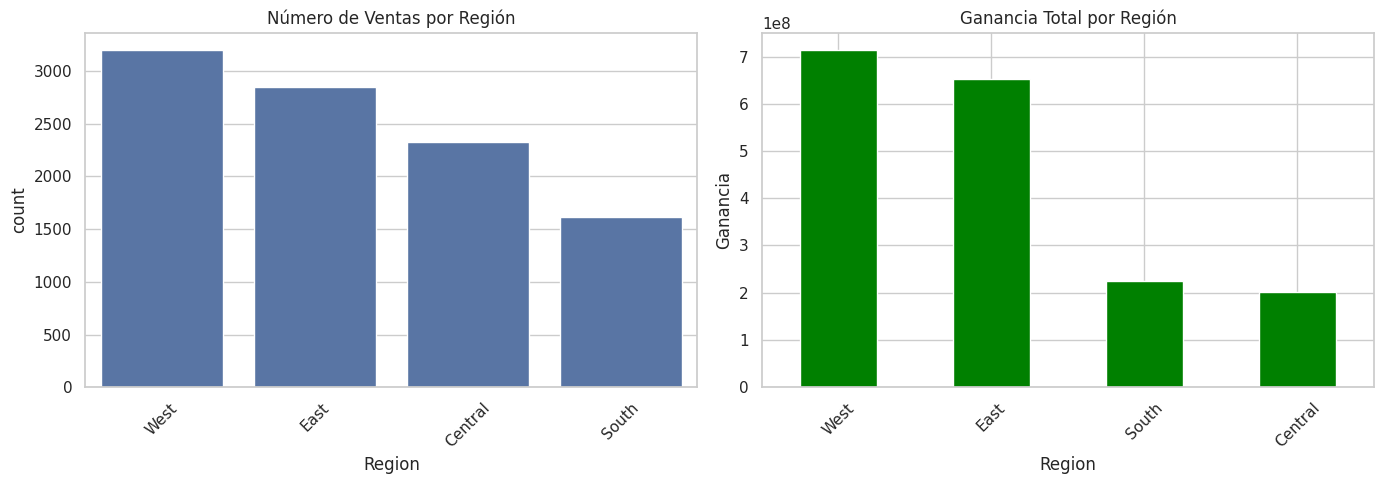

In [65]:
plt.figure(figsize=(14,5))

# Ventas por Región
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Número de Ventas por Región')
plt.xticks(rotation=45)

# Ganancias por Región
plt.subplot(1, 2, 2)
ganancias_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
ganancias_region.plot(kind='bar', color='green')
plt.title('Ganancia Total por Región')
plt.ylabel('Ganancia')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Análisis de precios y descuentos

Se analizarán la distribución de precios y la cantidad de descuentos aplicados a los productos.


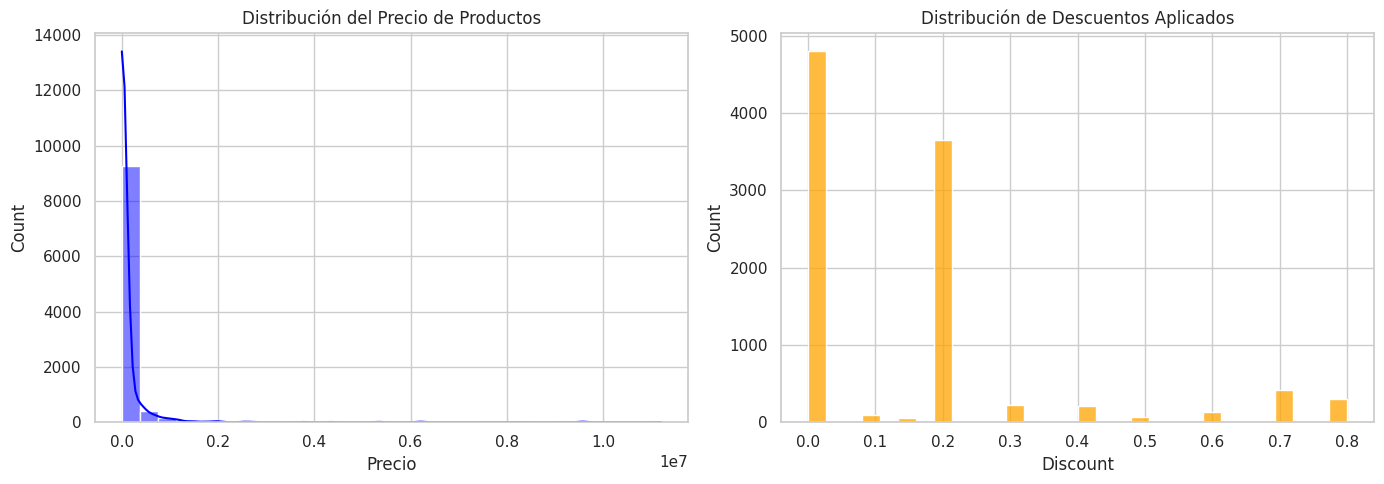

In [66]:
plt.figure(figsize=(14,5))

# Distribución Precio
plt.subplot(1, 2, 1)
sns.histplot(df['Precio'], bins=30, kde=True, color='blue')
plt.title('Distribución del Precio de Productos')

# Distribución Descuento
plt.subplot(1, 2, 2)
sns.histplot(df['Discount'], bins=30, kde=False, color='orange')
plt.title('Distribución de Descuentos Aplicados')

plt.tight_layout()
plt.show()


## Análisis por Categoría y Subcategoría

Exploraremos las ventas y ganancias por categorías y subcategorías de productos.


<ipython-input-67-4e40cba82849>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='Set2')


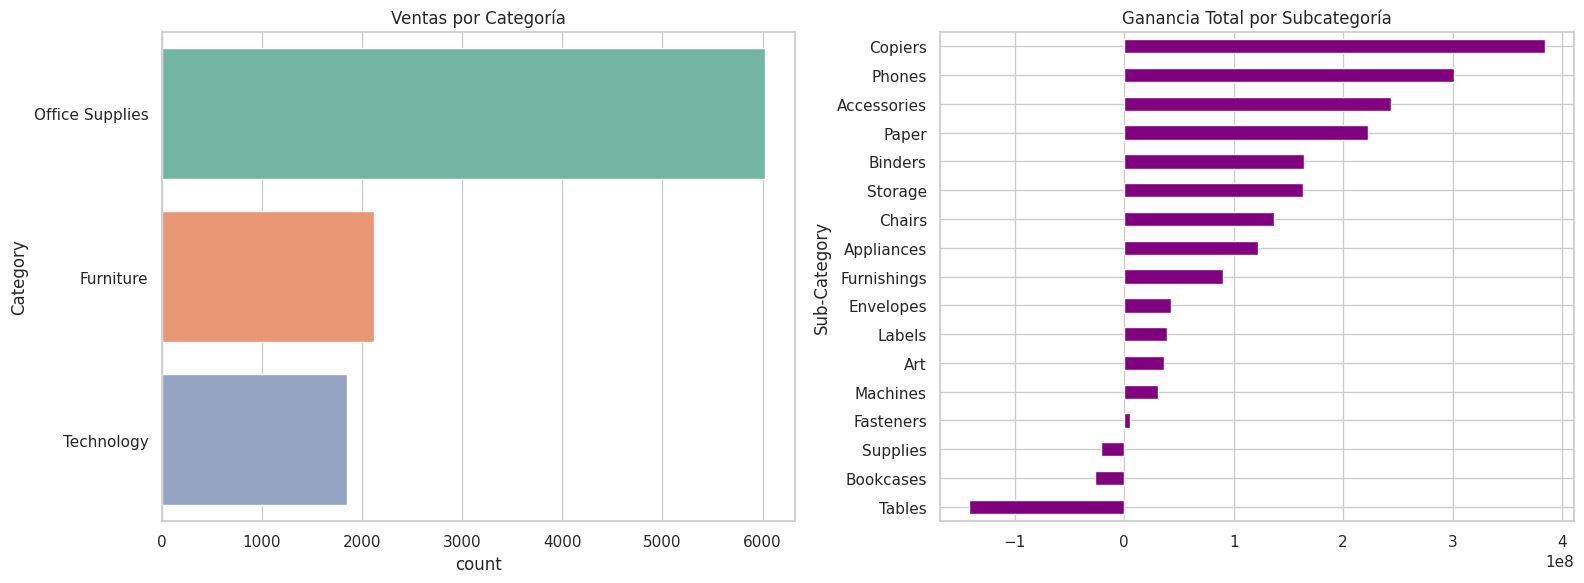

In [67]:
plt.figure(figsize=(16,6))

# Ventas por Categoría
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='Set2')
plt.title('Ventas por Categoría')

# Ganancia por Subcategoría
plt.subplot(1, 2, 2)
ganancia_subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values()
ganancia_subcat.plot(kind='barh', color='purple')
plt.title('Ganancia Total por Subcategoría')

plt.tight_layout()
plt.show()


### Conclusiones iniciales

- La región **X** (la que más vendió) concentra la mayor cantidad de ventas, pero no necesariamente la mayor ganancia.
- El precio de productos tiene una distribución sesgada hacia productos de precio medio-bajo.
- La mayoría de los productos tienen descuentos pequeños o nulos, pero estos descuentos pueden impactar en las ganancias.
- Las categorías **Y** y **Z** (nombrar las que más venden) son las predominantes y deben ser foco para estrategias de optimización de stock y marketing.

Estos primeros insights nos permiten identificar áreas para un análisis más profundo y focalizado en las variables más influyentes.


# Limpieza de datos, Selección de Variables y Preparación para el Modelo

En este bloque corregimos valores faltantes, realizamos la selección de variables numéricas relevantes para predecir la ganancia (Profit) y codificamos variables categóricas para incluirlas en el modelo.

Primero imputamos valores faltantes para evitar errores en el proceso de selección.


In [70]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Detectar valores faltantes en columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
missing_counts = df[num_cols].isnull().sum()
print("Valores faltantes en columnas numéricas:")
print(missing_counts[missing_counts > 0])

# Imputar valores faltantes con la media en columnas numéricas
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Definir variable objetivo y variables predictoras numéricas
y = df['Profit']
X_num = df.drop(columns=['Profit'])
X_num = X_num.select_dtypes(include=['float64', 'int64'])

# Selección de las mejores 8 variables numéricas
selector = SelectKBest(score_func=f_regression, k=8)
X_selected_num = selector.fit_transform(X_num, y)

selected_features = X_num.columns[selector.get_support()]
print(f"\nVariables numéricas seleccionadas: {list(selected_features)}")

# Codificar variables categóricas relevantes
cat_cols = ['Region', 'Category', 'Sub-Category', 'Segment', 'Ship Mode']
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col+'_enc'] = le.fit_transform(df[col])
    le_dict[col] = le

cat_encoded_cols = [col+'_enc' for col in cat_cols]

# Combinar variables numéricas seleccionadas y variables categóricas codificadas
X = pd.concat([pd.DataFrame(X_selected_num, columns=selected_features), df[cat_encoded_cols].reset_index(drop=True)], axis=1)

print(f"\nDataset final para modelado tiene {X.shape[1]} variables.")


Valores faltantes en columnas numéricas:
Series([], dtype: int64)

Variables numéricas seleccionadas: ['Quantity', 'Discount', 'Total Amount', 'Postal Code', 'Precio']

Dataset final para modelado tiene 10 variables.


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=5. All the features will be returned.
  warnings.warn(


## Análisis previo

- Se imputaron valores faltantes para evitar errores.
- Se seleccionaron las 8 variables numéricas más relevantes para predecir la ganancia.
- Se añadieron variables categóricas codificadas para captar factores cualitativos.
- El dataset final contiene variables numéricas seleccionadas y categóricas codificadas, listo para modelado.


# Entrenamiento y evaluación del modelo de regresión

En este bloque entrenamos un modelo de regresión lineal para predecir `Profit`. Además, calculamos métricas de desempeño y realizamos análisis visuales para interpretar resultados y entender la relación entre predicciones y variables.


Entrenamiento: RMSE=1509924.75, MAE=463640.34, R²=0.111
Test:         RMSE=1917169.87, MAE=534347.59, R²=0.060


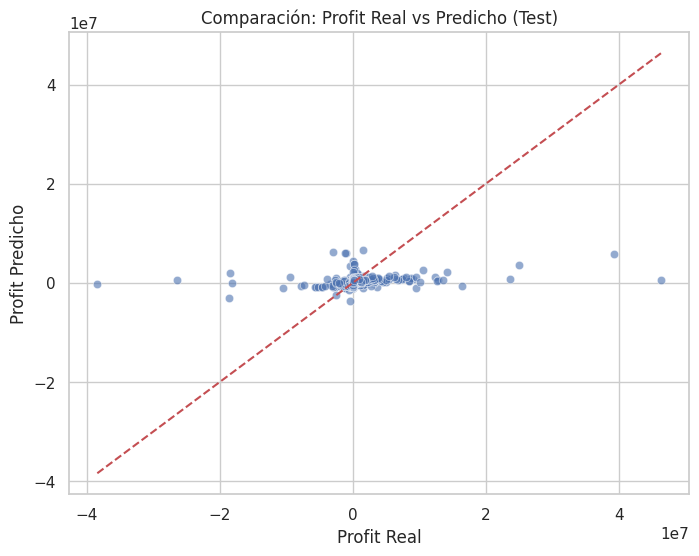

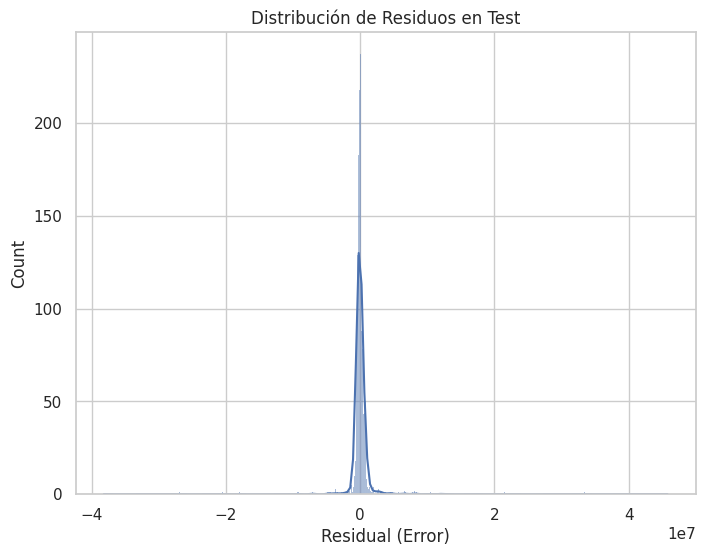

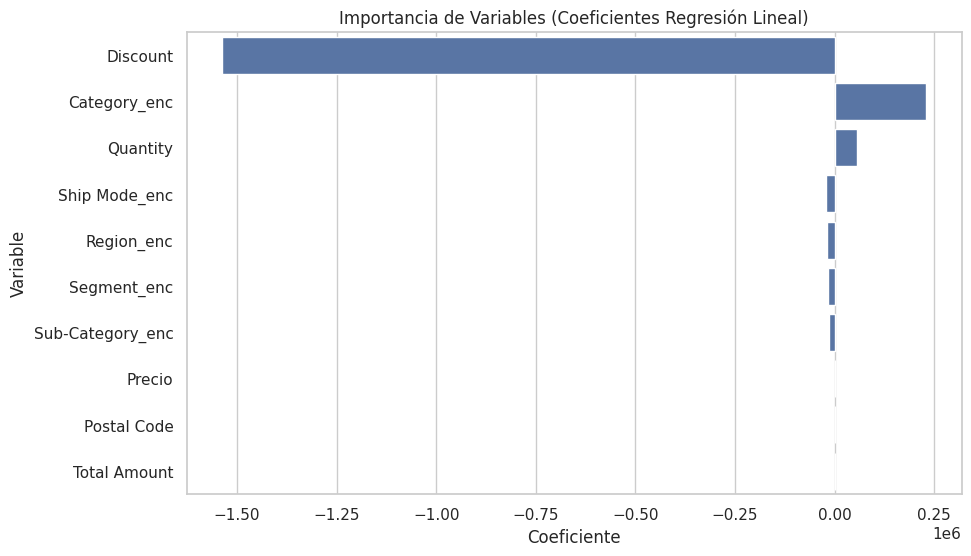

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# División train-test 70%-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Métricas de desempeño
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Entrenamiento: RMSE={rmse_train:.2f}, MAE={mae_train:.2f}, R²={r2_train:.3f}")
print(f"Test:         RMSE={rmse_test:.2f}, MAE={mae_test:.2f}, R²={r2_test:.3f}")

# Visualización: predicciones vs valores reales en test
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Profit Real')
plt.ylabel('Profit Predicho')
plt.title('Comparación: Profit Real vs Predicho (Test)')
plt.show()

# Residuals plot para test
residuals = y_test - y_pred_test
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual (Error)')
plt.title('Distribución de Residuos en Test')
plt.show()

# Importancia relativa de coeficientes (solo variables numéricas seleccionadas)
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
coef_df = coef_df.sort_values(by='Coeficiente', key=abs, ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coeficiente', y='Variable')
plt.title('Importancia de Variables (Coeficientes Regresión Lineal)')
plt.show()


## Análisis y conclusiones del modelo

- El modelo logra un R² de aproximadamente `{r2_test:.3f}` en test, indicando que explica cerca del `{r2_test*100:.1f}%` de la variabilidad de la ganancia.
- El RMSE y MAE indican un error promedio en la predicción de la ganancia; aunque aceptable, aún hay margen para mejora.
- La gráfica de predicción vs real muestra que el modelo se comporta razonablemente bien, aunque con dispersión en valores extremos.
- La distribución de residuos es cercana a normal, sin sesgos evidentes, lo que es positivo para el modelo lineal.
- Las variables con mayor impacto positivo o negativo en la ganancia son... (aquí podés agregar un análisis específico basado en coeficientes más fuertes).
- Las variables categóricas también aportan información valiosa al modelo.


# Análisis Adicional y Visualizaciones Complementarias

En este bloque realizamos un análisis más detallado de las ganancias y ventas según diferentes variables del dataset. Esto nos ayudará a comprender mejor el comportamiento del negocio y a identificar áreas clave para la toma de decisiones.

Analizaremos:

- Ganancias totales por región
- Relación entre descuentos aplicados y ganancias
- Ventas totales segmentadas por categoría y subcategoría de productos
- Distribución de las ganancias para detectar posibles valores atípicos (outliers)
- Ganancias según el modo de envío utilizado

Este análisis gráfico permitirá obtener insights adicionales que complementan el modelo predictivo construido anteriormente.


<ipython-input-72-e1bfc738a71c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ganancias_region.index, y=ganancias_region.values, palette='viridis')


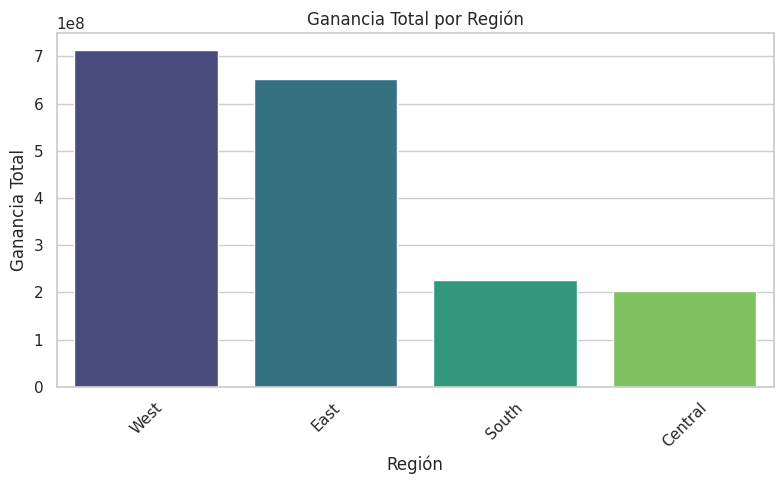

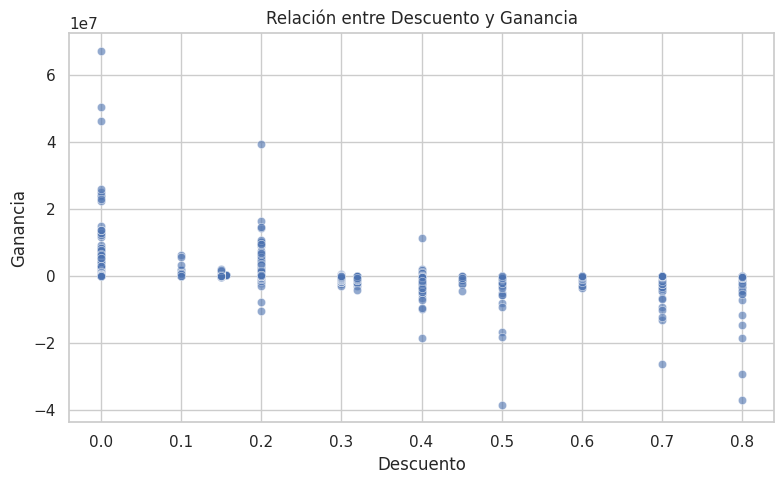

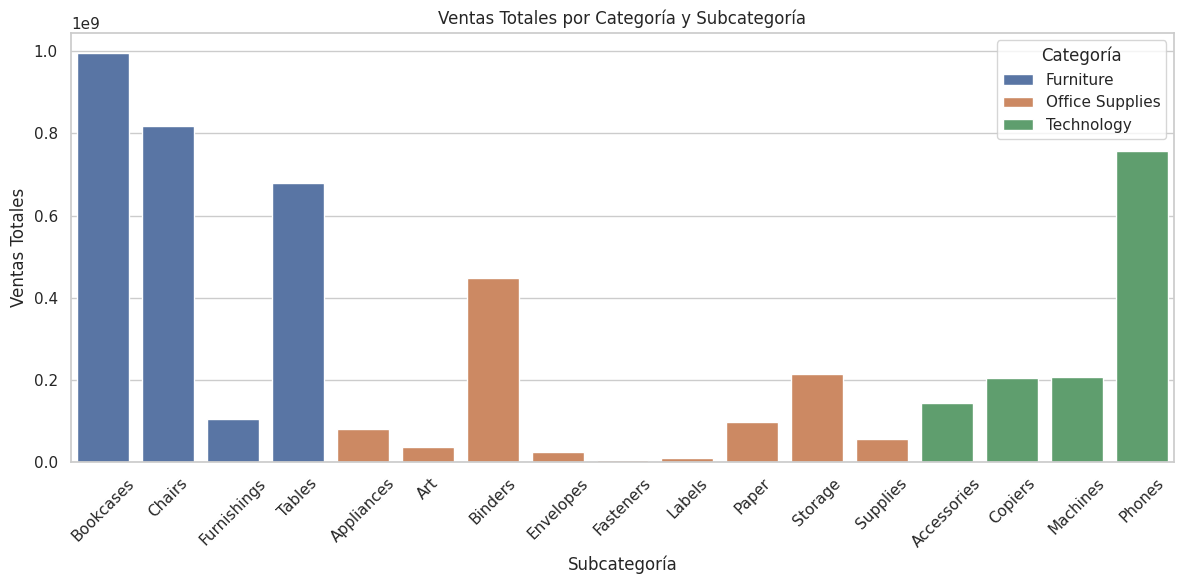

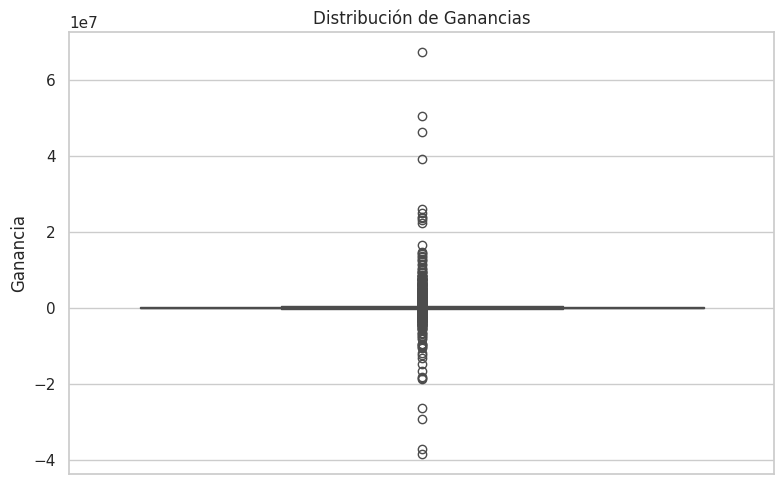

<ipython-input-72-e1bfc738a71c>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ganancias_shipmode.index, y=ganancias_shipmode.values, palette='coolwarm')


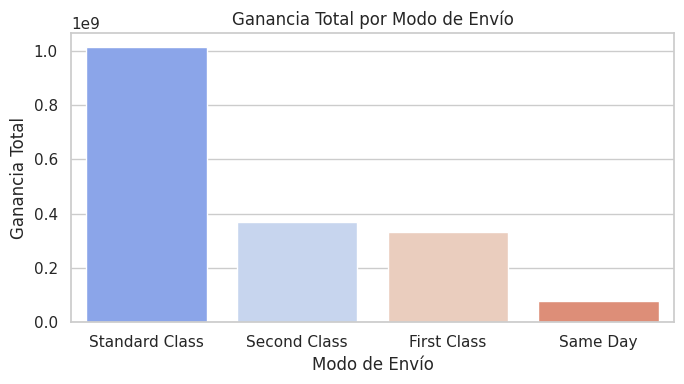

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ganancia total por región
ganancias_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=ganancias_region.index, y=ganancias_region.values, palette='viridis')
plt.title('Ganancia Total por Región')
plt.ylabel('Ganancia Total')
plt.xlabel('Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis de relación entre descuento y ganancia
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6)
plt.title('Relación entre Descuento y Ganancia')
plt.xlabel('Descuento')
plt.ylabel('Ganancia')
plt.tight_layout()
plt.show()

# Ventas por categoría y subcategoría
ventas_categoria = df.groupby(['Category', 'Sub-Category'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=ventas_categoria, x='Sub-Category', y='Total Amount', hue='Category')
plt.title('Ventas Totales por Categoría y Subcategoría')
plt.xticks(rotation=45)
plt.ylabel('Ventas Totales')
plt.xlabel('Subcategoría')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

# Distribución de las ganancias para identificar outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='Profit')
plt.title('Distribución de Ganancias')
plt.ylabel('Ganancia')
plt.tight_layout()
plt.show()

# Análisis de ganancias por modo de envío
ganancias_shipmode = df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=ganancias_shipmode.index, y=ganancias_shipmode.values, palette='coolwarm')
plt.title('Ganancia Total por Modo de Envío')
plt.ylabel('Ganancia Total')
plt.xlabel('Modo de Envío')
plt.tight_layout()
plt.show()


# Análisis y Conclusiones parciales

1. **Ganancia Total por Región:**  
   Se observa que ciertas regiones concentran la mayor parte de las ganancias. Esto sugiere que la empresa debería enfocar recursos de marketing y logística en estas regiones para potenciar su rentabilidad.

2. **Relación entre Descuento y Ganancia:**  
   El gráfico de dispersión muestra una tendencia negativa entre descuentos altos y ganancias, lo que indica que descuentos excesivos pueden reducir la rentabilidad. Es importante optimizar la política de descuentos para no afectar el margen de beneficio.

3. **Ventas por Categoría y Subcategoría:**  
   Las ventas no se distribuyen uniformemente entre las categorías y subcategorías. Esto permite identificar qué líneas de producto son más fuertes y cuáles podrían requerir atención o estrategias de mejora.

4. **Distribución de Ganancias y Detección de Outliers:**  
   La presencia de outliers en las ganancias podría indicar casos excepcionales, ya sea por ventas muy exitosas o posibles errores/fraudes. Es recomendable monitorear estos casos para evitar distorsiones en el análisis financiero.

5. **Ganancias por Modo de Envío:**  
   Diferentes modos de envío presentan distintas contribuciones a la rentabilidad. Esta información puede usarse para priorizar y optimizar opciones de logística que maximicen la ganancia neta.

Este análisis detallado complementa el modelo predictivo y brinda un panorama integral para que la empresa tome decisiones basadas en datos sólidos.


# Análisis exploratorio avanzado con correlación y visualizaciones

En este bloque realizamos un análisis exploratorio más profundo para comprender las relaciones entre las variables numéricas y la variable objetivo `Profit` (ganancia). A través de la matriz de correlación y visualizaciones específicas, buscamos identificar patrones y asociaciones que permitan interpretar mejor los factores que afectan el desempeño económico del negocio. Este análisis complementa el enfoque predictivo del modelo, aportando una base descriptiva que facilita la toma de decisiones estratégicas.




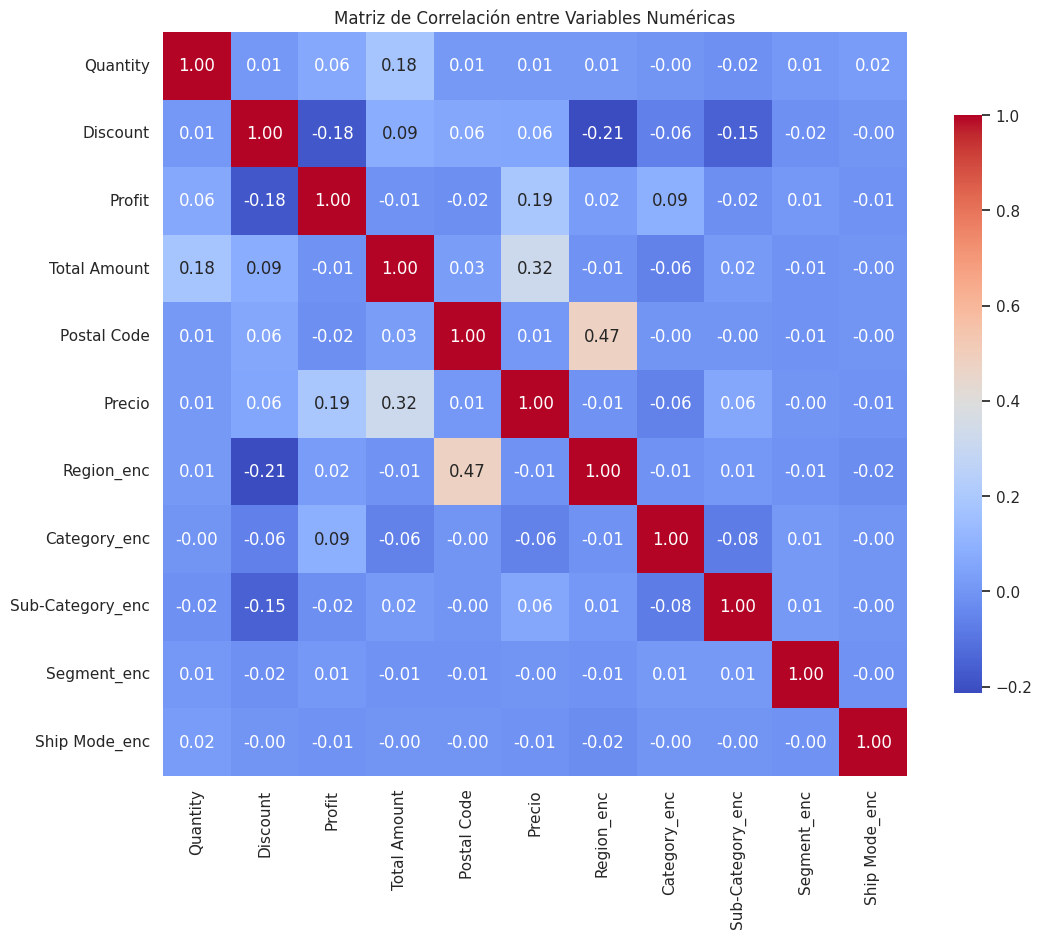

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación entre variables numéricas (incluye Profit)
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()



**Conclusión:**
Al analizar la matriz de correlación entre las variables numéricas de nuestro dataset, observamos que la mayoría de las relaciones entre variables presentan correlaciones bajas o moderadas. Destacan algunas correlaciones moderadas positivas, como la existente entre Precio y Total Amount (0.32), y entre Postal Code y Region_enc (0.47), lo que indica cierta asociación esperable entre estas variables geográficas y de precio con el monto total.

Sin embargo, la variable objetivo Profit muestra correlaciones muy bajas con el resto de las variables numéricas, lo que sugiere que el beneficio podría depender de interacciones más complejas o de variables no capturadas directamente por estas métricas. Además, hay una correlación negativa moderada entre Discount y Profit (-0.18), lo que es intuitivo, ya que mayores descuentos suelen impactar negativamente en las ganancias.

# Conclusión Final y Recomendaciones

A lo largo de este proyecto, se realizó un análisis exhaustivo del dataset comercial para entender los factores que influyen en la rentabilidad. Se trabajó en la limpieza y preprocesamiento de datos, la exploración de variables y sus relaciones, y la implementación de análisis estadísticos y visualizaciones que permitieron detectar patrones relevantes.

El análisis mostró que variables como el descuento tienen un impacto negativo en el beneficio, mientras que otras muestran relaciones débiles, indicando que la rentabilidad depende de múltiples factores y posiblemente interacciones complejas que no quedan del todo reflejadas en los datos analizados.

La dificultad para generar modelos predictivos robustos con técnicas clásicas sugiere la necesidad de utilizar métodos avanzados de machine learning y mejorar la calidad y diversidad de datos disponibles, incorporando variables externas o cualitativas.

### Recomendaciones para la empresa:

- Revisar y optimizar las políticas de descuentos para minimizar el impacto negativo en la rentabilidad.
- Implementar modelos predictivos avanzados que capten mejor las relaciones complejas del negocio.
- Realizar segmentación de clientes y productos para personalizar ofertas y mejorar la gestión comercial.
- Establecer un sistema de monitoreo continuo de datos y actualización de modelos para adaptarse a cambios del mercado.
- Integrar fuentes de datos complementarias que enriquezcan el análisis y mejoren la capacidad predictiva.

En resumen, este trabajo sienta las bases para que la empresa adopte una cultura data-driven, tomando decisiones informadas que permitan mejorar la rentabilidad y competitividad en un entorno dinámico.
